Polynomial regression with l2 reg. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import softmax
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv("Student_Performance.csv")
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Добавляем новые колонки - произведения существующих, проверяем, что столбцы линейно независимы

In [5]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x: 1 if x == "Yes" else 0)

x: np.ndarray = df.drop(columns=["Performance Index"]).to_numpy()
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
columns = x.shape[1]
print(columns)
for col1 in range(columns):
    for col2 in range(columns):
        if col1 != 2 and col2 != 2:
            x = np.column_stack((x, x[:, col1] * x[:, col2]))
#  добавляем столбец 1 (y = wx + b => y = WX, где X = x + 1, W = w + b)
x = np.column_stack((x, np.ones(x.shape[0])))
print(x.shape[1]) #  x.shape[1] + (x.shape[1]-1)**2 + 1 - количетсво признаков, после генерации новых

5
22


[0.75       1.         1.         1.         0.11111111 0.5625
 0.75       0.75       0.08333333 0.75       1.         1.
 0.11111111 0.75       1.         1.         0.11111111 0.08333333
 0.11111111 0.11111111 0.01234568 1.        ]
4.146419734800338


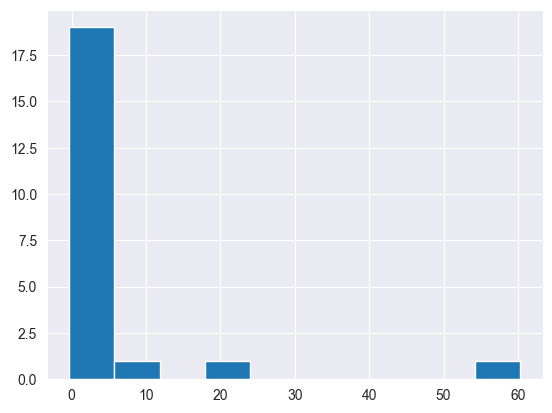

In [56]:
y: np.ndarray = df["Performance Index"].to_numpy()
alpha = 0.005

print(x[0])
w = np.linalg.inv(x.T @ x + alpha * np.eye(x.shape[1])) @ x.T @ y
y_fit = x@w
MSE = np.mean((y_fit-y)**2)
print(MSE)

plt.hist(w)
plt.show()

In [7]:
print(w, len(w))

[ 2.23516558e+01  6.03196514e+01  6.14686085e-01  1.75704308e+00
  1.55772974e+00  3.04305237e-01 -3.47778138e-02  1.58993354e-01
  4.23348952e-02 -3.47778168e-02 -3.06619376e-01  1.43878563e-01
 -3.31928542e-02  1.58993359e-01  1.43878569e-01  2.02449079e-01
  1.37448364e-01  4.23348939e-02 -3.31928619e-02  1.37448356e-01
  3.92751849e-02  1.16719474e+01] 22


Как мы видим, многие веса модели крайне малы, гораздо эффективнее с их минимизацией справится l1 регуляризация.

In [58]:
def MSE(y, y_pred):
    return ((y - y_pred)**2).mean()

alpha = 0.01
beta = 1

l1_array = np.zeros(shape=(x.shape[1]))
for coordinate in range(x.shape[1]):
    if abs(w[coordinate]) < 10 ** -7:
        l1_array[coordinate] = 0
    elif w[coordinate] > 0:
        l1_array[coordinate] = -1/2
    else:
        l1_array[coordinate] = 1/2
        
w_elastic = np.linalg.pinv(x.T @ x + alpha * np.eye(x.shape[1])) @ (x.T @ y + beta * l1_array)
    
print(f"{MSE(y, x@w_elastic)} - MSE")
print(w_elastic)


4.146426838146202 - MSE
[ 2.23459616e+01  6.02863646e+01  6.14586937e-01  1.75840421e+00
  1.55420473e+00  3.04632108e-01 -2.88884089e-02  1.58594370e-01
  4.19296216e-02 -2.88884138e-02 -2.85702144e-01  1.43886441e-01
 -2.74440919e-02  1.58594379e-01  1.43886437e-01  2.02013957e-01
  1.36776412e-01  4.19296128e-02 -2.74440919e-02  1.36776416e-01
  3.79120206e-02  1.16809234e+01]


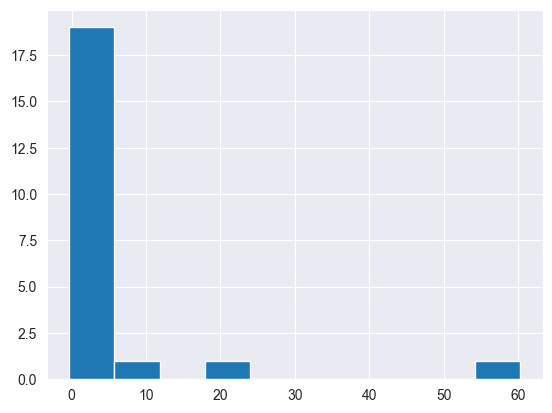

In [59]:
plt.hist(w_elastic)
plt.show()